# Freezing emulsions  - Results notebook (V2)

Welcome to this notebook ! The code below has been developed to analyse the confocal images obtained during the freezing of emulsions. The results have been reported in the following paper:
"5D imaging of freezing emulsions with solute effects", by Dmytro Dedovets, Cécile Monteux,and Sylvain Deville, and published in Science in 2018.

If you want to use this code and the data we provided, you should organise your files as follows. Create a main directory with 2 subdirectory:
- "code": put the notebooks here
- "data": put the data here

You should run the "Freezing emulsions - particle dynamics" notebook first. The current notebook read the results of the analysis done in the previous notebook (droplet trajectories, fluoresence profile, interface position) and anlyse them.

Feedback is welcome, keep in touch with us if you want to discuss anything,

## Import the modules

In [1]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 6))
mpl.rc('image', cmap='gray')

import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp
import time
import skimage as sk

from IPython import display
from IPython.display import clear_output
from IPython.display import display
import ipywidgets as widgets

import sys

In [2]:
import random
from scipy import ndimage
from skimage import morphology, util, filters, exposure
from scipy import misc
from os import walk  		# needed to list all files in directory
from os import path 		# needed to save file
from os import makedirs
from os import remove
from os import path 		# needed to save file
import os
import shutil # to deal with directories
import fnmatch

In [3]:
%qtconsole

## Script init

In [4]:
dirResults = 'Z:/PhD/Experiments & Results/Data Complete/results/'+'resultsInterface/'    # where to write the results
# Figure file type
fig_file_type = '.png'
plt.rcParams['figure.figsize'] = 5, 5

## Particle position vs relative time (fig S2)

In [5]:
sorted_av_pos_one_mic = pd.read_csv('Z:/PhD/Experiments & Results/Data Complete/results/sorted_average_pos_rel_timeST18.008(10c-mm,1mkm-sec,+10,-10)Series003.csv')
#sorted_av_pos_two_mic = pd.read_csv('Z:/PhD/Experiments & Results/Data Complete/results/sorted_average_pos_rel_timeST18.008(10c-mm,3mkm-sec,+10,-10)Series001.csv')
sorted_av_pos_three_mic = pd.read_csv('Z:/PhD/Experiments & Results/Data Complete/results/sorted_average_pos_rel_timeST18.008(10c-mm,3mkm-sec,+10,-10)Series001.csv')
#sorted_av_pos_four_mic = pd.read_csv('Z:/PhD/Experiments & Results/Data Complete/results/sorted_average_pos_rel_timeST18.008(10c-mm,3mkm-sec,+10,-10)Series001.csv')
sorted_av_pos_five_mic = pd.read_csv('Z:/PhD/Experiments & Results/Data Complete/results/sorted_average_pos_rel_timeST18.009(10c-mm,4mkm-sec,+10,-10)Series002.csv')
sorted_av_pos_six_mic = pd.read_csv('Z:/PhD/Experiments & Results/Data Complete/results/sorted_average_pos_rel_timeST18.009(10c-mm,6mkm-sec,+10,-10)Series003.csv')
sorted_av_pos_eight_mic = pd.read_csv('Z:/PhD/Experiments & Results/Data Complete/results/sorted_average_pos_rel_timeST18.009(10c-mm,8mkm-sec,+10,-10)Series004.csv')
sorted_av_pos_ten_mic = pd.read_csv('Z:/PhD/Experiments & Results/Data Complete/results/sorted_average_pos_rel_timeST18.008(10c-mm,10mkm-sec,+10,-10)Series004.csv')

In [6]:
cp_one_mic = pd.read_csv('Z:/PhD/Experiments & Results/Data Complete/results/sorted_average_pos_rel_timeST18.008(10c-mm,1mkm-sec,+10,-10)Series003.csv')
#cp_two_mic = pd.read_csv('../results/collapsed_position_DD17.026A(2mkm-sec)Series004.csv')
cp_three_mic = pd.read_csv('Z:/PhD/Experiments & Results/Data Complete/results/collapsed_position_ST18.008(10c-mm,3mkm-sec,+10,-10)Series001.csv')
cp_four_mic = pd.read_csv('Z:/PhD/Experiments & Results/Data Complete/results/collapsed_position_ST18.009(10c-mm,4mkm-sec,+10,-10)Series002.csv')
cp_five_mic = pd.read_csv('Z:/PhD/Experiments & Results/Data Complete/results/collapsed_position_ST18.008(10c-mm,5mkm-sec,+10,-10)Series002.csv')
cp_six_mic = pd.read_csv('Z:/PhD/Experiments & Results/Data Complete/results/collapsed_position_ST18.009(10c-mm,6mkm-sec,+10,-10)Series003.csv')
cp_eight_mic = pd.read_csv('Z:/PhD/Experiments & Results/Data Complete/results/collapsed_position_ST18.009(10c-mm,8mkm-sec,+10,-10)Series004.csv')
cp_ten_mic = pd.read_csv('Z:/PhD/Experiments & Results/Data Complete/results/sorted_average_pos_rel_timeST18.008(10c-mm,10mkm-sec,+10,-10)Series004.csv')

NameError: name 'sorted_av_pos_four_mic' is not defined

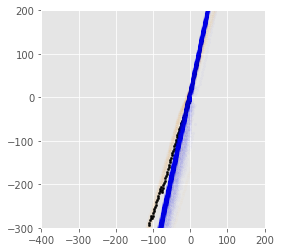

In [9]:
plt.style.use('ggplot')
plt.figure(figsize=(4,4))
plt.ylim(-300,200)
plt.xlim(-400,200)

plt.scatter(cp_three_mic['relative_time'],cp_three_mic['x_abs'], 
            color='orange', alpha=0.02,s=5)
plt.scatter(sorted_av_pos_three_mic['relative_time'][22:86], sorted_av_pos_three_mic['x'][22:86], 
            color='black',s=5)


plt.scatter(cp_four_mic['relative_time'],cp_four_mic['x_abs'], 
            color='blue', alpha=0.02,s=5)
plt.scatter(sorted_av_pos_four_mic['relative_time'][22:86], sorted_av_pos_four_mic['x'][22:86], 
            color='black',s=5)


plt.scatter(cp_five_mic['relative_time'],cp_five_mic['x_abs'], 
            color='red', alpha=0.02,s=5)
plt.scatter(sorted_av_pos_five_mic['relative_time'][17:60],sorted_av_pos_five_mic['x'][17:60],
            color='black', s=5)
    
plt.scatter(cp_six_mic['relative_time'],cp_six_mic['x_abs'], 
            color='red', alpha=0.02,s=5)
plt.scatter(sorted_av_pos_six_mic['relative_time'][17:60],sorted_av_pos_six_mic['x'][17:60],
            color='black', s=5)

#plt.scatter(cp_ten_mic['relative_time'],cp_ten_mic['x_abs'], 
 #           color='green', alpha=0.02,s=5)
#plt.scatter(sorted_av_pos_ten_mic['relative_time'][5:50], sorted_av_pos_ten_mic['x'][5:50], 
 #           color='black',s=5)

plt.xlabel('Relative time (s)')
plt.ylabel(r'Distance to interface ($\mu m$)')

plt.tight_layout()
file_name = 'Z:/PhD/Experiments & Results/Data Complete/results/masterplot_position.png' #+ fig_file_type
plt.savefig(file_name, dpi=600);

plt.scatter(sorted_av_pos_three_mic['relative_time'][10:62], sorted_av_pos_three_mic['x'][10:62])
plt.scatter(sorted_av_pos_four_mic['relative_time'][10:58], sorted_av_pos_four_mic['x'][10:58])
plt.scatter(sorted_av_pos_five_mic['relative_time'][20:55], sorted_av_pos_five_mic['x'][20:55])
plt.scatter(sorted_av_pos_six_mic['relative_time'][10:60],sorted_av_pos_six_mic['x'][10:60])
plt.scatter(sorted_av_pos_eight_mic['relative_time'][10:60], sorted_av_pos_eight_mic['x'][10:60])

# Droplet velocity vs. relative time (Fig 2A)

In [10]:
four_mic_vel = pd.read_csv('Z:/PhD/Experiments & Results/Data Complete/results/sorted_average_velocity_rel_timeST18.009(10c-mm,4mkm-sec,+10,-10)Series002.csv')

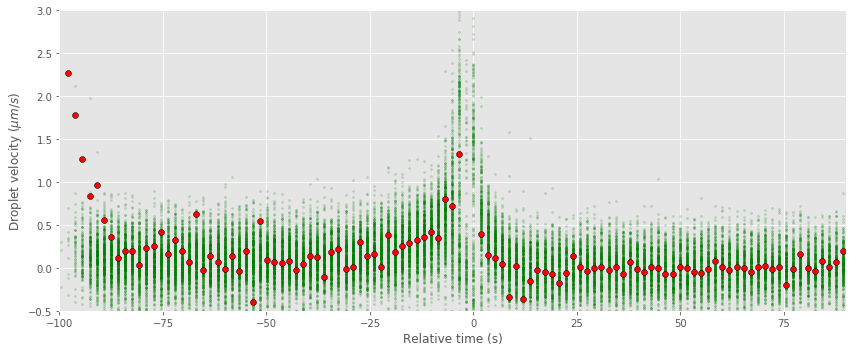

In [22]:
plt.figure(figsize=(12,5))
plt.ylim(-0.5,3)
plt.xlim(-100,90)

plt.scatter(cp_four_mic['relative_time'],cp_four_mic['x_velocity'], 
            s=4, color='green', alpha=0.2)
#plt.scatter(sorted_av_pos_six_mic['relative_time'][17:60],sorted_av_pos_six_mic['x_ve'][17:60],color='black', s=5)
  
plt.scatter(four_mic_vel.relative_time, four_mic_vel.velocity,s=35, color='red',edgecolor='black')

plt.xlabel('Relative time (s)')
plt.ylabel(r'Droplet velocity ($\mu m/s$)')

plt.tight_layout()
file_name = 'Z:/PhD/Experiments & Results/Data Complete/results/velocity4mic.png' #+ fig_file_type
plt.savefig(file_name, dpi=600);

# Particle velocity vs relative time

In [22]:
one_mic_vel = pd.read_csv('Z:/PhD/Experiments & Results/Data Complete/results/sorted_average_velocity_rel_timeST18.008(10c-mm,1mkm-sec,+10,-10)Series003.csv')
#two_mic_vel = pd.read_csv('../results/sorted_average_velocity_rel_timeDD17.026A(2mkm-sec)Series004.csv')
three_mic_vel = pd.read_csv('Z:/PhD/Experiments & Results/Data Complete/results/sorted_average_velocity_rel_timeST18.008(10c-mm,3mkm-sec,+10,-10)Series001.csv')
#four_mic_vel = pd.read_csv('../results/sorted_average_velocity_rel_timeDD17.027B(4mkm-sec)Series005.csv')
five_mic_vel = pd.read_csv('Z:/PhD/Experiments & Results/Data Complete/results/sorted_average_velocity_rel_timeST18.008(10c-mm,5mkm-sec,+10,-10)Series002.csv')
#six_mic_vel = pd.read_csv('../results/sorted_average_velocity_rel_timeDD17.026I(6mkm-sec)Series003.csv')
#eight_mic_vel = pd.read_csv('../results/sorted_average_velocity_rel_timeDD17.026H(8mkm-sec).csv')
ten_mic_vel = pd.read_csv('Z:/PhD/Experiments & Results/Data Complete/results/sorted_average_velocity_rel_timeST18.008(10c-mm,10mkm-sec,+10,-10)Series004.csv')

## Plot for 1 microns/s

Text(0,0.5,'Droplet velocity (microns/s)')

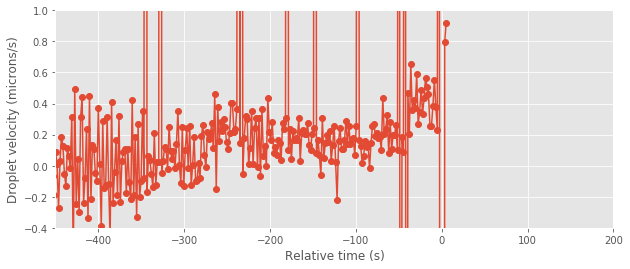

In [23]:
plt.figure(1, figsize=(10, 4))
plt.plot(one_mic_vel.relative_time, one_mic_vel.velocity, '-o' )
plt.xlim(-450,200)
plt.ylim(-0.4,1)
plt.xlabel('Relative time (s)')
plt.ylabel('Droplet velocity (microns/s)')

## Plot for 2 microns/s

In [ ]:
plt.figure(1, figsize=(10, 4))
plt.plot(two_mic_vel.relative_time, two_mic_vel.velocity, '-o' )
plt.xlim(-200,50)
plt.ylim(-0.4,1)
plt.xlabel('Relative time (s)')
plt.ylabel('Droplet velocity (microns/s)')

## Plot for 3 microns/s

Text(0,0.5,'Droplet velocity (microns/s)')

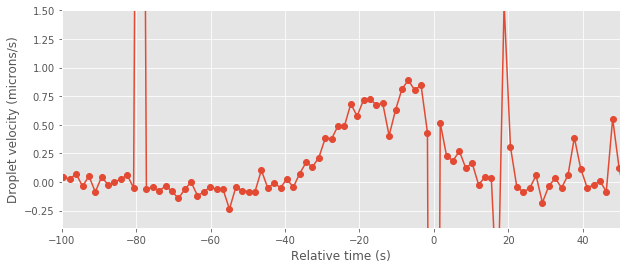

In [24]:
plt.figure(1, figsize=(10, 4))
plt.plot(three_mic_vel.relative_time, three_mic_vel.velocity, '-o' )
plt.xlim(-100,50)
plt.ylim(-0.4,1.5)
plt.xlabel('Relative time (s)')
plt.ylabel('Droplet velocity (microns/s)')

## Plot for 4 microns/s

Text(0,0.5,'Droplet velocity (microns/s)')

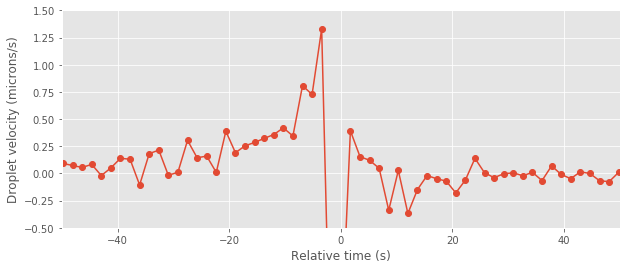

In [14]:
plt.figure(1, figsize=(10, 4))
plt.plot(four_mic_vel.relative_time, four_mic_vel.velocity, '-o' )
plt.xlim(-50,50)
plt.ylim(-0.5,1.5)
plt.xlabel('Relative time (s)')
plt.ylabel('Droplet velocity (microns/s)')

## Plot for 5 microns/s

Text(0,0.5,'Droplet velocity (microns/s)')

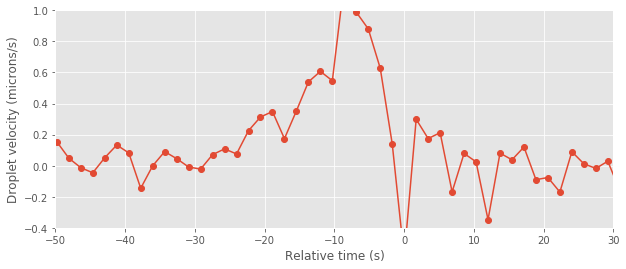

In [25]:
plt.figure(1, figsize=(10, 4))
plt.plot(five_mic_vel.relative_time, five_mic_vel.velocity, '-o' )
plt.xlim(-50,30)
plt.ylim(-0.4,1)
plt.xlabel('Relative time (s)')
plt.ylabel('Droplet velocity (microns/s)')

## Plot for 6 microns/s

In [15]:
plt.figure(1, figsize=(10, 4))
plt.plot(six_mic_vel.relative_time, six_mic_vel.velocity, '-o' )
plt.xlim(-30,20)
plt.ylim(-0.4,0.8)
plt.xlabel('Relative time (s)')
plt.ylabel('Droplet velocity (microns/s)')

NameError: name 'six_mic_vel' is not defined

## Plot for 8 microns/s

In [ ]:
plt.figure(1, figsize=(10, 4))
plt.plot(eight_mic_vel.relative_time, eight_mic_vel.velocity, '-o' )
plt.xlim(-20,20)
plt.ylim(-0.4,1.2)
plt.xlabel('Relative time (s)')
plt.ylabel('Droplet velocity (microns/s)')

## Plot for 10 microns/s

Text(0,0.5,'Droplet velocity (microns/s)')

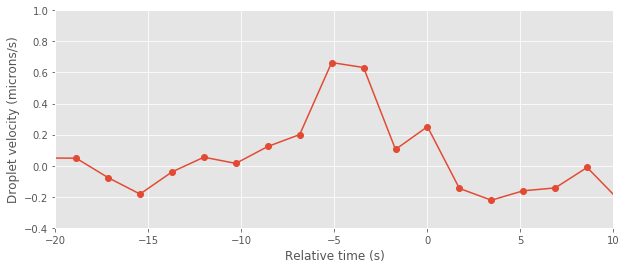

In [26]:
plt.figure(1, figsize=(10, 4))
plt.plot(ten_mic_vel.relative_time, ten_mic_vel.velocity, '-o' )
plt.xlim(-20,10)
plt.ylim(-0.4,1)
plt.xlabel('Relative time (s)')
plt.ylabel('Droplet velocity (microns/s)')

We can use these plot to measure the interfaction time, which is the time during which the droplet velocity is not 0.

## Plot Fig 2D

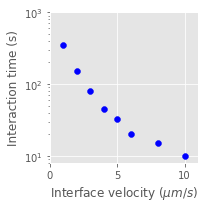

In [27]:
interaction_time =[[1,2,3,4,5,6,8,10],[350,150,80,45,33,20,15,10]]

plt.figure(1, figsize=(3, 3))
plt.style.use('ggplot')
plt.scatter(interaction_time[0],interaction_time[1], marker='o', color='blue', s=35)
plt.xlabel('Interface velocity ($\mu m/s$)')
plt.ylabel('Interaction time (s)')
plt.xlim(0,11)
#plt.ylim(-30,500)
plt.ylim(8,1000)
plt.yscale('log')
plt.tight_layout()
file_name = '../results/masterplot_interactiontime.png' #+ fig_file_type
plt.savefig(file_name, dpi=600);

## Compute the particle displacement by integrating the velocity vs time

In [28]:
from scipy import integrate

In [29]:
subset = one_mic_vel[(one_mic_vel['relative_time']>-400) & (one_mic_vel['relative_time']<200)]
area_one_mic = integrate.simps(subset.velocity, subset.relative_time)

#subset = two_mic_vel[(two_mic_vel['relative_time']>-100) & (two_mic_vel['relative_time']<50)]
#area_two_mic = integrate.simps(subset.velocity, subset.relative_time)

subset = three_mic_vel[(three_mic_vel['relative_time']>-100) & (three_mic_vel['relative_time']<50)]
area_three_mic = integrate.simps(subset.velocity, subset.relative_time)

#subset = four_mic_vel[(four_mic_vel['relative_time']>-50) & (four_mic_vel['relative_time']<20)]
#area_four_mic = integrate.simps(subset.velocity, subset.relative_time)

subset = five_mic_vel[(five_mic_vel['relative_time']>-40) & (five_mic_vel['relative_time']<20)]
area_five_mic = integrate.simps(subset.velocity, subset.relative_time)

#subset = six_mic_vel[(six_mic_vel['relative_time']>-20) & (six_mic_vel['relative_time']<10)]
#area_six_mic = integrate.simps(subset.velocity, subset.relative_time)

#subset = eight_mic_vel[(eight_mic_vel['relative_time']>-20) & (eight_mic_vel['relative_time']<10)]
#area_eight_mic = integrate.simps(subset.velocity, subset.relative_time)

subset = ten_mic_vel[(ten_mic_vel['relative_time']>-10) & (ten_mic_vel['relative_time']<5)]
area_ten_mic = integrate.simps(subset.velocity, subset.relative_time)

integrated_displacement = [ ]
integrated_displacement.append(area_one_mic)
#integrated_displacement.append(area_two_mic)
integrated_displacement.append(area_three_mic)
#integrated_displacement.append(area_four_mic)
integrated_displacement.append(area_five_mic)
#integrated_displacement.append(area_six_mic)
#integrated_displacement.append(area_eight_mic)
integrated_displacement.append(area_ten_mic)

velocities = [1,2,3,4,5,6,8,10]

## Plot Fig 2E

ValueError: x and y must be the same size

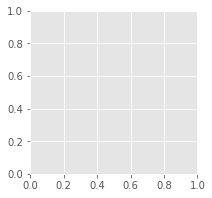

In [30]:
plt.figure(1, figsize=(3, 3))
plt.style.use('ggplot')

plt.scatter(velocities,integrated_displacement, edgecolor='black', color='blue', s=35)
plt.xlabel(r'Interface velocity ($\mu m/s$)')
plt.ylabel(r'Droplet displacement ($\mu m$)')
plt.ylim(1,100)
#plt.yscale('log')
plt.xlim(0,11)
plt.tight_layout()

file_name = 'Z:/PhD/Experiments & Results/Data Complete/results/masterplot_displacement.png' #+ fig_file_type
plt.savefig(file_name, dpi=600)

# Read and plot the velocity data

In [ ]:
one_mic = pd.read_csv('../results/average_velocity_DD17.026B(1mkm-sec)Series007.csv')
two_mic = pd.read_csv('../results/average_velocity_DD17.026A(2mkm-sec)Series004.csv')
three_mic = pd.read_csv('../results/average_velocity_DD17.026C(3mkm-sec)Series003.csv')
four_mic = pd.read_csv('../results/average_velocity_DD17.027B(4mkm-sec)Series005.csv')
five_mic = pd.read_csv('../results/average_velocity_DD17.026D(5mkm-sec).csv')
six_mic = pd.read_csv('../results/average_velocity_DD17.026I(6mkm-sec)Series003.csv')
eight_mic = pd.read_csv('../results/average_velocity_DD17.026H(8mkm-sec).csv')
ten_mic = pd.read_csv('../results/average_velocity_DD17.026F(10mkm-sec).csv')

## Shift the baseline to 0

In [16]:
baseline = np.mean(one_mic['mean_velocity'][15:25])
if baseline>0:
    one_mic['mean_velocity'] = one_mic['mean_velocity'] + baseline
else:
    one_mic['mean_velocity'] = one_mic['mean_velocity'] - baseline
    
baseline = np.mean(two_mic['mean_velocity'][10:20])
if baseline>0:
    two_mic['mean_velocity'] = two_mic['mean_velocity'] - baseline
else:
    two_mic['mean_velocity'] = two_mic['mean_velocity'] + baseline
    
baseline = np.mean(three_mic['mean_velocity'][20:35])
if baseline>0:
    three_mic['mean_velocity'] = three_mic['mean_velocity'] - baseline
else:
    three_mic['mean_velocity'] = three_mic['mean_velocity'] + baseline

baseline = np.mean(four_mic['mean_velocity'][10:35])
if baseline>0:
    four_mic['mean_velocity'] = four_mic['mean_velocity'] - baseline
else:
    four_mic['mean_velocity'] = four_mic['mean_velocity'] + baseline


    baseline = np.mean(five_mic['mean_velocity'][10:35])
if baseline>0:
    five_mic['mean_velocity'] = five_mic['mean_velocity'] - baseline
else:
    five_mic['mean_velocity'] = five_mic['mean_velocity'] + baseline

baseline = np.mean(six_mic['mean_velocity'][10:40])
if baseline>0:
    six_mic['mean_velocity'] = six_mic['mean_velocity'] - baseline
else:
    six_mic['mean_velocity'] = six_mic['mean_velocity'] + baseline


baseline = np.mean(eight_mic['mean_velocity'][20:40])
if baseline>0:
    eight_mic['mean_velocity'] = eight_mic['mean_velocity'] - baseline
else:
    eight_mic['mean_velocity'] = eight_mic['mean_velocity'] + baseline

    
baseline = np.mean(ten_mic['mean_velocity'][20:40])
if baseline>0:
    ten_mic['mean_velocity'] = ten_mic['mean_velocity'] - baseline
else:
    ten_mic['mean_velocity'] = ten_mic['mean_velocity'] + baseline


NameError: name 'one_mic' is not defined

## Measure the distance at which droplets start to move, using their velocity vs. distance plot

## Plot for 1 microns/s

In [ ]:
fig, ax = plt.subplots()
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
minorLocator = MultipleLocator(5)
ax.xaxis.set_minor_locator(minorLocator)
plt.plot(one_mic['position'], one_mic['mean_velocity'], 'o-', markersize=3, color='blue')
plt.xlim(-400,100)
plt.ylim(-0.2, 0.6)
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.xlabel('Relative position to interface (microns)')
plt.ylabel('Droplet instantaneous velocity (normalized)')

## Plot for 2 microns/s

In [ ]:
fig, ax = plt.subplots()
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
minorLocator = MultipleLocator(5)
ax.xaxis.set_minor_locator(minorLocator)
plt.plot(two_mic['position'], two_mic['mean_velocity'], 'o-', markersize=3, color='green')
plt.xlim(-250,150)
plt.ylim(-0.4, 1)
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.xlabel('Relative position to interface (microns)')
plt.ylabel('Droplet instantaneous velocity (normalized)')

## Plot for 3 microns/s

In [ ]:
fig, ax = plt.subplots()
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
minorLocator = MultipleLocator(5)
ax.xaxis.set_minor_locator(minorLocator)
plt.plot(three_mic['position'], three_mic['mean_velocity'], 'o-', markersize=3, color='black')
plt.xlim(-200,150)
plt.ylim(-0.4, 1.5)
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.xlabel('Relative position to interface (microns)')
plt.ylabel('Droplet instantaneous velocity (normalized)')

## Plot for 4 microns/s

NameError: name 'four_mic' is not defined

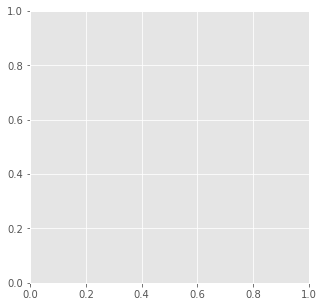

In [17]:
fig, ax = plt.subplots()
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
minorLocator = MultipleLocator(5)
ax.xaxis.set_minor_locator(minorLocator)
plt.plot(four_mic['position'], four_mic['mean_velocity'], 'o-', markersize=3, color='orange')
plt.xlim(-150,100)
plt.ylim(-0.4, 1)
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.xlabel('Relative position to interface (microns)')
plt.ylabel('Droplet instantaneous velocity (normalized)')

## Plot for 5 microns/s

In [ ]:
fig, ax = plt.subplots()
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
minorLocator = MultipleLocator(5)
ax.xaxis.set_minor_locator(minorLocator)
plt.plot(five_mic['position'], five_mic['mean_velocity'], 'o-', markersize=3, color='orange')
plt.xlim(-150,50)
plt.ylim(-0.4, 1)
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.xlabel('Relative position to interface (microns)')
plt.ylabel('Droplet instantaneous velocity (normalized)')

## Plot for 6 microns/s

In [ ]:
fig, ax = plt.subplots()
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
minorLocator = MultipleLocator(5)
ax.xaxis.set_minor_locator(minorLocator)
plt.plot(six_mic['position'], six_mic['mean_velocity'], 'o-', markersize=3, color='pink')
plt.xlim(-100,100)
plt.ylim(-0.4, 1)
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.xlabel('Relative position to interface (microns)')
plt.ylabel('Droplet instantaneous velocity (normalized)')

## Plot for 8 microns/s

In [ ]:
fig, ax = plt.subplots()
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
minorLocator = MultipleLocator(5)
ax.xaxis.set_minor_locator(minorLocator)
plt.plot(eight_mic['position'], eight_mic['mean_velocity'], 'o-', markersize=3, color='black')
plt.xlim(-150,50)
plt.ylim(-0.4, 1)
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.xlabel('Relative position to interface (microns)')
plt.ylabel('Droplet instantaneous velocity (normalized)')

## Plot for 10 microns/s

In [ ]:
fig, ax = plt.subplots()
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
minorLocator = MultipleLocator(5)
ax.xaxis.set_minor_locator(minorLocator)
plt.plot(ten_mic['position'], ten_mic['mean_velocity'], 'o-', markersize=3, color='red')
plt.xlim(-150,50)
plt.ylim(-0.4, 1)
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.xlabel('Relative position to interface (microns)')
plt.ylabel('Droplet instantaneous velocity (normalized)')

We can use the above plot to determine the distance at which the droplets start moving.

In [ ]:
initial_distance =[[1,2,3,4,5,6,8,10],[270,170,150,80,100,60,50,50]]

In [ ]:
import scipy as sp  
from scipy.optimize import curve_fit                                                                                                                                                                                                       
import scipy.optimize as opt                                                                                                            

def model_func(t, a, b):                                                         
    #return a * np.exp(-b * t) + c 
    #return a * t*t + b*t + c
    return a* np.sqrt(t) + b 

opt_parms, parm_cov = sp.optimize.curve_fit(model_func, initial_distance[0], initial_distance[1], maxfev=100000, p0=(-80, 300))          
a,b = opt_parms                                                                   

## Plot the distance from interface where droplets start moving

In [ ]:
plt.style.use('ggplot')
plt.figure(1, figsize=(3, 3))
x = np.linspace(0,10,10)

#fit_plot = model_func(x,a,b)
plt.scatter(initial_distance[0], initial_distance[1], edgecolor="black", color='blue', s=35)
plt.ylabel('$L_v$ ($\mu m$)')
plt.xlabel('Interface velocity ($\mu m/s$)')
plt.xlim(0,11)
#plt.yscale('log')
plt.tight_layout()
#plt.plot(fit_plot)
file_name = '../results/initiation_distance.png' #+ fig_file_type
plt.savefig(file_name, dpi=600)

In [ ]:
def compute_average(data):
    # Function to compute the average value (by intervals) in a serie
    # 100 intervals of 10 pixels
    
    average_concentration = pd.DataFrame(columns=['position','mean_concentration', 'std']) # create an empty dataframe to store results
    for i in range(100):
        sub = data[(data.x_abs>(-500+i*10-5)) & (data.x_abs<(-500+i*10+5))]
        mean_conc = np.mean(sub.intensity)
        std_dev_conc = np.std(sub.intensity)/np.sqrt(len(sub)-1)
        average_concentration = average_concentration.append([{'position': -500+i*10,
                                                 'mean_concentration':mean_conc, 
                                                 'std':std_dev_conc}])
    return average_concentration

## Plot Fig 2B and 2C

In [ ]:
three_mic = pd.read_csv('../results/average_velocity_DD17.026C(3mkm-sec)Series003.csv')
three_mic_concentration = pd.read_csv('../results/concentration_profile_DD17.026C(3mkm-sec)Series003.csv')
av_3mic = compute_average(three_mic_concentration)
av_3mic_crop = av_3mic[(av_3mic.position>-300) & (av_3mic.position<0)]
three_mic_crop = three_mic[(three_mic['position']>-300) & (three_mic['position']<0)]

In [ ]:
# shift the baseline
vel = three_mic_crop['mean_velocity']-np.min(three_mic_crop['mean_velocity'])
vel = vel/np.max(vel)

conc = av_3mic_crop.mean_concentration/np.min(av_3mic_crop.mean_concentration)
#conc = conc/np.max(conc)

In [ ]:
f, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=True, figsize=(5, 5))
f.subplots_adjust(hspace=0.08)
frame1 = plt.gca()

plt.subplot(2, 1, 1)
#plt.scatter(three_mic.position, three_mic.mean_velocity, color='orange')
plt.scatter(cp_three_mic['x_abs'],cp_three_mic['x_velocity'], 
            s=4, color='green', alpha=0.2)
plt.scatter(three_mic['position'], three_mic['mean_velocity'], s=15, edgecolor='black', color='red')


plt.xlim(-300, 200)
plt.ylim(-.2,2)
plt.ylabel(r'Droplet velocity ($\mu m/s$)')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')
plt.subplot(2, 1, 2)
plt.scatter(three_mic_concentration.x_abs, three_mic_concentration.intensity/12.848151, 
            s=10, alpha=0.005)
plt.scatter(av_3mic.position, av_3mic.mean_concentration/12.848151, 
            color='red', edgecolor='black')
#plt.scatter(three_mic_concentration.x_abs, three_mic_concentration.norm_intensity, s=10, alpha=0.005)
#plt.scatter(av_3mic.position, av_3mic.mean_concentration/np.max(av_3mic.mean_concentration), color='red', edgecolor='black')

plt.xlim(-300, 200)
plt.ylim(0, 3.5)
plt.xlabel(r'Distance to interface ($\mu m$)')
plt.ylabel(r'Concentration ($a.u.$)')
plt.tight_layout()
file_name = '../results/mutipannels_velocity_plot.png' #+ fig_file_type
plt.savefig(file_name, dpi=600)

# Measure $L_c$ from the concentration profile

In [ ]:
one_mic = pd.read_csv('../results/average_velocity_DD17.026B(1mkm-sec)Series007.csv')
two_mic = pd.read_csv('../results/average_velocity_DD17.026A(2mkm-sec)Series004.csv')
three_mic = pd.read_csv('../results/average_velocity_DD17.026C(3mkm-sec)Series003.csv')
four_mic = pd.read_csv('../results/average_velocity_DD17.027B(4mkm-sec)Series005.csv')
five_mic = pd.read_csv('../results/average_velocity_DD17.026D(5mkm-sec).csv')
six_mic = pd.read_csv('../results/average_velocity_DD17.026I(6mkm-sec)Series003.csv')
eight_mic = pd.read_csv('../results/average_velocity_DD17.026H(8mkm-sec).csv')
ten_mic = pd.read_csv('../results/average_velocity_DD17.026F(10mkm-sec).csv')

In [ ]:
one_mic_concentration = pd.read_csv('../results/concentration_profile_DD17.026B(1mkm-sec)Series007.csv')
two_mic_concentration = pd.read_csv('../results/concentration_profile_DD17.026A(2mkm-sec)Series004.csv')
three_mic_concentration = pd.read_csv('../results/concentration_profile_DD17.026C(3mkm-sec)Series003.csv')
four_mic_concentration = pd.read_csv('../results/concentration_profile_DD17.027B(4mkm-sec)Series005.csv')
five_mic_concentration = pd.read_csv('../results/concentration_profile_DD17.026D(5mkm-sec).csv')
six_mic_concentration = pd.read_csv('../results/concentration_profile_DD17.026I(6mkm-sec)Series003.csv')
eight_mic_concentration = pd.read_csv('../results/concentration_profile_DD17.026H(8mkm-sec).csv')
ten_mic_concentration = pd.read_csv('../results/concentration_profile_DD17.026F(10mkm-sec).csv')

In [ ]:
av_1mic = compute_average(one_mic_concentration)
av_2mic = compute_average(two_mic_concentration)
av_3mic = compute_average(three_mic_concentration)
av_4mic = compute_average(four_mic_concentration)
av_5mic = compute_average(five_mic_concentration)
av_6mic = compute_average(six_mic_concentration)
av_8mic = compute_average(eight_mic_concentration)
av_10mic = compute_average(ten_mic_concentration)

In [ ]:
av_1mic_crop = av_1mic[(av_1mic.position>-300) & (av_1mic.position<0)]
one_mic_crop = one_mic[(one_mic['position']>-300) & (one_mic['position']<0)]

av_2mic_crop = av_2mic[(av_2mic.position>-300) & (av_2mic.position<0)]
two_mic_crop = two_mic[(two_mic['position']>-300) & (two_mic['position']<0)]

av_3mic_crop = av_3mic[(av_3mic.position>-300) & (av_3mic.position<0)]
three_mic_crop = three_mic[(three_mic['position']>-300) & (three_mic['position']<0)]

av_4mic_crop = av_4mic[(av_4mic.position>-300) & (av_4mic.position<0)]
four_mic_crop = four_mic[(four_mic['position']>-300) & (four_mic['position']<0)]

av_5mic_crop = av_5mic[(av_5mic.position>-300) & (av_5mic.position<0)]
five_mic_crop = five_mic[(five_mic['position']>-300) & (five_mic['position']<0)]

av_6mic_crop = av_6mic[(av_6mic.position>-300) & (av_6mic.position<0)]
six_mic_crop = six_mic[(six_mic['position']>-300) & (six_mic['position']<0)]

av_8mic_crop = av_8mic[(av_8mic.position>-300) & (av_8mic.position<0)]
eight_mic_crop = eight_mic[(eight_mic['position']>-300) & (eight_mic['position']<0)]

av_10mic_crop = av_10mic[(av_10mic.position>-300) & (av_10mic.position<0)]
ten_mic_crop = ten_mic[(ten_mic['position']>-300) & (ten_mic['position']<0)]

## Plot for 1 microns/s

In [ ]:
plt.scatter(av_1mic.position, av_1mic.mean_concentration, color='red', edgecolor='black')
plt.xlabel('Distance to the interface ($\mu m$)')
plt.ylabel('Concentration (a.u.)')
plt.xlim(-400, 0)
plt.ylim(10, 80)

## Plot for 2 microns/s

In [ ]:
plt.scatter(av_2mic.position, av_2mic.mean_concentration, color='red', edgecolor='black')
plt.xlabel('Distance to the interface ($\mu m$)')
plt.ylabel('Concentration (a.u.)')
plt.xlim(-400, 0)
plt.ylim(10, 40)

## Plot for 3 microns/s

In [ ]:
plt.scatter(av_3mic.position, av_3mic.mean_concentration, color='red', edgecolor='black')
plt.xlabel('Distance to the interface ($\mu m$)')
plt.ylabel('Concentration (a.u.)')
plt.xlim(-250, 0)
plt.ylim(10, 40)

## Plot for 4 microns/s

In [ ]:
plt.scatter(av_4mic.position, av_4mic.mean_concentration, color='red', edgecolor='black')
plt.xlabel('Distance to the interface ($\mu m$)')
plt.ylabel('Concentration (a.u.)')
plt.xlim(-200, 50)
plt.ylim(10, 20)

## Plot for 5 microns/s

In [ ]:
plt.scatter(av_5mic.position, av_5mic.mean_concentration, color='red', edgecolor='black')
plt.xlabel('Distance to the interface ($\mu m$)')
plt.ylabel('Concentration (a.u.)')
plt.xlim(-200, 0)
plt.ylim(20, 35)

## Plot for 6 microns/s

In [ ]:
plt.scatter(av_6mic.position, av_6mic.mean_concentration, color='red', edgecolor='black')
plt.xlabel('Distance to the interface ($\mu m$)')
plt.ylabel('Concentration (a.u.)')
plt.xlim(-200, 0)
plt.ylim(20, 40)

## Plot for 8 microns/s

In [ ]:
plt.scatter(av_8mic.position, av_8mic.mean_concentration, color='red', edgecolor='black')
plt.xlabel('Distance to the interface ($\mu m$)')
plt.ylabel('Concentration (a.u.)')
plt.xlim(-200, 0)
plt.ylim(35,45)

## Plot for 10 microns/s

In [ ]:
plt.scatter(av_10mic.position, av_10mic.mean_concentration, color='red', edgecolor='black')
plt.xlabel('Distance to the interface ($\mu m$)')
plt.ylabel('Concentration (a.u.)')
plt.xlim(-150, 0)
plt.ylim(25,30)

We can now use the concentration profile plots to measure $L_c$ for each sequence.

In [ ]:
diffusion_length =[[1,2,3,4,5,6,8,10],[220,190,130,120,110,80,100,70]]

In [ ]:
plt.figure(1, figsize=(4, 4))
plt.style.use('ggplot')
plt.scatter(diffusion_length[0], diffusion_length[1], color='blue',s=35, edgecolor='black')
plt.ylabel('$L_c$ ($\mu m$)')

plt.xlabel(r'Interface velocity ($\mu m/s$)')

## Plot Fig 2F

In [ ]:
plt.figure(1, figsize=(3.2, 3))
plt.style.use('ggplot')
plt.scatter(initial_distance[1], diffusion_length[1], color='blue',s=35, edgecolor='black')
plt.ylabel('$L_c$ ($\mu m$)')
plt.xlabel('$L_v$ ($\mu m$)')
plt.yticks([50, 100, 150, 200, 250])
plt.xticks([50, 100, 150, 200, 250])
#plt.xlim(40,220)
#plt.ylim(40,250)
plt.tight_layout()
file_name = '../results/velocity_vs_concentration.png' #+ fig_file_type
plt.savefig(file_name, dpi=600)

# Plot Fig 2g

In [ ]:
gradient = np.gradient(conc)

In [ ]:
plt.figure(1, figsize=(3.2, 3))
plt.style.use('ggplot')
plt.scatter(gradient, vel,s=35, color='blue', edgecolor='black')
plt.xlabel('Concentration \n gradient ($a.u.$)')
plt.ylabel('Droplet velocity U \n ($\mu m/s$)')
#plt.yticks([50, 100, 150, 200, 250])
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5])
#plt.xlim(40,210)
plt.ylim(0,1.1)
plt.xlim(0,0.5)

In [ ]:
#%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py\n",
# you need to run the line above only once
%load_ext version_information
%reload_ext version_information
%version_information numpy, scipy, matplotlib, pandas, trackpy, skimage